In [22]:
# Import Dependencies
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# Connect to SQLite dB
con = sqlite3.connect('/Users/jennadodge/uofo-virt-data-pt-12-2021-u-b/Water_Quality_Analysis/Database/database.sqlite3')

# Create a cursor object
cur = con.cursor()

In [24]:
df = pd.read_sql_query("SELECT * FROM Census_Data INNER JOIN Contaminant_Summary on Census_Data.county_FIPS = Contaminant_Summary.county_FIPS",con)
df.head()

,county_FIPS,Geographic_Area_Name,County,GEOID,Total_Population,White,%_White,Black,%_Black,Native,...,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,county_FIPS,Num_Contaminants,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
0,1001,"Autauga County, Alabama",Autauga County,0500000US01001,58805,42160,0.716946,11446,0.194643,218,...,0.069410,0.986667,0.155018,0.4552,1001,6,551,27,148,91.83
1,1003,"Baldwin County, Alabama",Baldwin County,0500000US01003,231767,189399,0.817196,18218,0.078605,1583,...,0.103480,0.868861,0.212231,0.4566,1003,9,1625,28,580,180.56
2,1005,"Barbour County, Alabama",Barbour County,0500000US01005,25223,11317,0.448678,11934,0.473140,117,...,0.112569,1.164057,0.226599,0.5047,1005,3,1414,138,1132,471.33
3,1007,"Bibb County, Alabama",Bibb County,0500000US01007,22293,16555,0.742610,4414,0.197999,61,...,0.064188,0.879973,0.145676,0.4500,1007,9,2538,17,1895,282.00
4,1009,"Blount County, Alabama",Blount County,0500000US01009,59134,50663,0.856749,846,0.014306,338,...,0.176138,0.808008,0.319759,0.4685,1009,30,37191,18,5219,1239.70


In [25]:
con.close()

In [26]:
df.shape

(443, 36)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   county_FIPS             443 non-null    int64  
 1   Geographic_Area_Name    443 non-null    object 
 2   County                  443 non-null    object 
 3   GEOID                   443 non-null    object 
 4   Total_Population        443 non-null    int64  
 5   White                   443 non-null    int64  
 6   %_White                 443 non-null    float64
 7   Black                   443 non-null    int64  
 8   %_Black                 443 non-null    float64
 9   Native                  443 non-null    int64  
 10  %_Native                443 non-null    float64
 11  Asian                   443 non-null    int64  
 12  %_Asian                 443 non-null    float64
 13  Pacific_Islander        443 non-null    int64  
 14  %_Pacific_Islander      443 non-null    fl

In [28]:
df.describe()

,county_FIPS,Total_Population,White,%_White,Black,%_Black,Native,%_Native,Asian,%_Asian,...,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,county_FIPS,Num_Contaminants,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
count,443.000000,4.430000e+02,4.430000e+02,443.000000,4.430000e+02,443.000000,443.000000,443.000000,443.000000,443.000000,...,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,4.430000e+02,443.000000
mean,27947.207675,1.057726e+05,7.490522e+04,0.849769,1.419085e+04,0.057547,661.595937,0.013467,4061.467269,0.010494,...,0.073029,0.640573,0.151925,0.442437,27947.207675,11.426637,1.441209e+04,216.593679,8.217971e+03,1005.784402
std,13431.191350,3.138956e+05,1.637848e+05,0.126880,7.653677e+04,0.102420,2926.075680,0.055578,23211.981148,0.016201,...,0.065864,0.303843,0.101345,0.032996,13431.191350,9.893136,1.071698e+05,367.280137,1.063009e+05,4270.490495
min,1001.000000,7.620000e+02,6.980000e+02,0.255915,1.000000e+00,0.000248,1.000000,0.000274,1.000000,0.000163,...,0.011866,0.202798,0.036514,0.334800,1001.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,17169.000000,1.417850e+04,1.200250e+04,0.819070,8.200000e+01,0.004553,48.000000,0.002209,44.000000,0.003103,...,0.032328,0.400065,0.083808,0.418900,17169.000000,5.000000,2.040500e+03,5.000000,9.445000e+02,301.550000
50%,29047.000000,3.113400e+04,2.683600e+04,0.899126,6.220000e+02,0.015021,125.000000,0.003541,144.000000,0.004682,...,0.049063,0.550279,0.117508,0.438400,29047.000000,9.000000,5.163000e+03,38.000000,1.564000e+03,666.440000
75%,30096.000000,8.371600e+04,7.226150e+04,0.932481,4.038500e+03,0.059837,462.000000,0.006163,805.500000,0.009259,...,0.089167,0.845691,0.188893,0.463350,30096.000000,16.000000,1.211450e+04,269.500000,2.279500e+03,1148.900000
max,54109.000000,5.275541e+06,2.345983e+06,0.967415,1.205825e+06,0.699392,56895.000000,0.671650,413272.000000,0.128284,...,0.441067,1.803719,0.632997,0.550900,54109.000000,71.000000,2.215481e+06,2334.000000,2.200535e+06,88619.240000


In [29]:
df.columns

Index(['county_FIPS', 'Geographic_Area_Name', 'County', 'GEOID',
       'Total_Population', 'White', '%_White', 'Black', '%_Black', 'Native',
       '%_Native', 'Asian', '%_Asian', 'Pacific_Islander',
       '%_Pacific_Islander', 'Other', '%_Other', '2+_Races', '%_2+_Races',
       'Non-White', '%_Non-White', 'Hispanic', '%_Hispanic', 'Not_Hispanic',
       '%_Not_Hispanic', 'Simpson_Race_DI', 'Simpson_Ethnic_DI',
       'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index', 'county_FIPS',
       'Num_Contaminants', 'Sum_ContaminantFactor', 'Min_Contaminant_Factor',
       'Max_Contaminant_Factor', 'Avg_Contaminant_Factor'],
      dtype='object')

In [30]:
# df[['Total_Population','%_White','%_Non-White','%_Hispanic', '%_Not_Hispanic','Simpson_Race_DI','Simpson_Ethnic_DI',
#        'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index']].describe()

<AxesSubplot:>

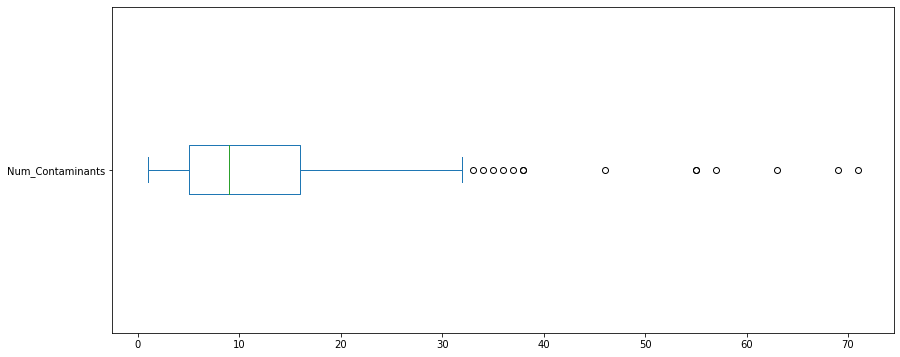

In [31]:
df['Num_Contaminants'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

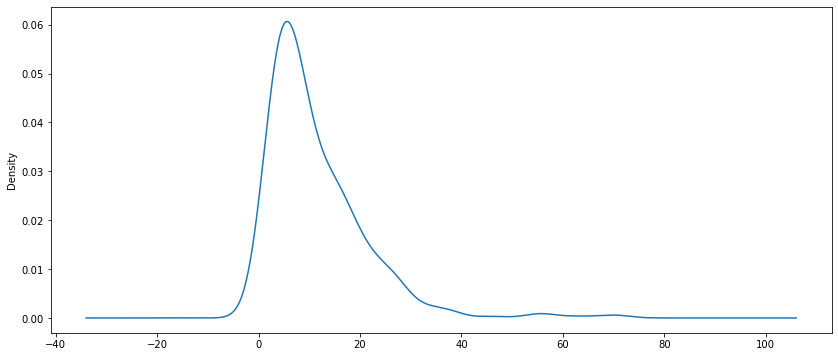

In [33]:
df['Num_Contaminants'].plot(kind="density", figsize=(14,6))

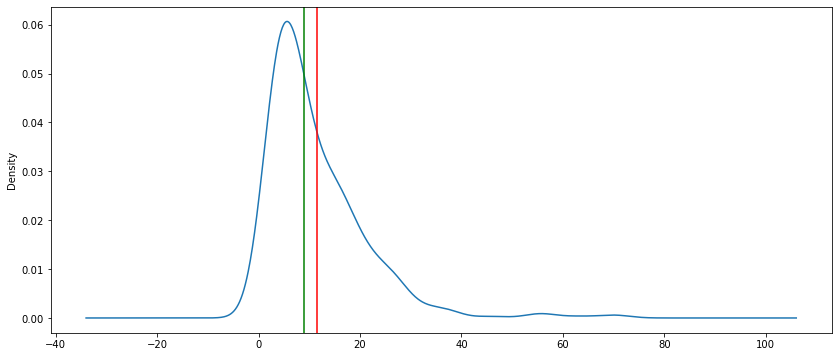

In [34]:
ax = df['Num_Contaminants'].plot(kind="density", figsize=(14,6))
ax.axvline(df['Num_Contaminants'].mean(), color='red')
ax.axvline(df['Num_Contaminants'].median(), color='green')

Text(0.5, 0, 'Number of Contaminants')

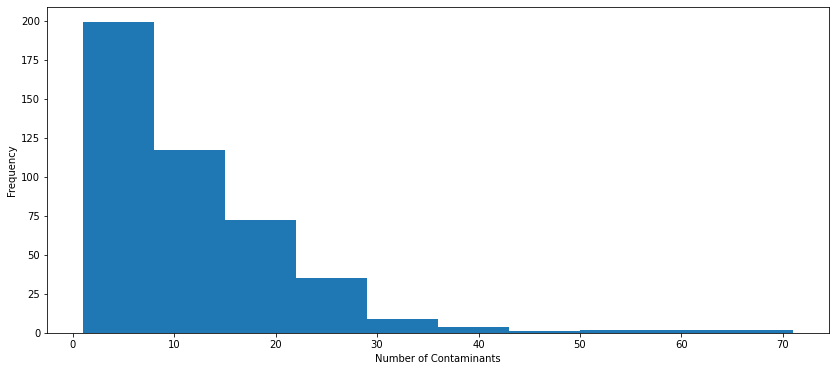

In [35]:
ax = df['Num_Contaminants'].plot(kind="hist", figsize=(14,6))
ax.set_xlabel('Number of Contaminants')


In [36]:
#correlation between columns

corr = df.corr()

corr

,county_FIPS,Total_Population,White,%_White,Black,%_Black,Native,%_Native,Asian,%_Asian,...,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,county_FIPS,Num_Contaminants,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
county_FIPS,1.000000,-0.008787,0.024319,0.368793,-0.054149,-0.411636,-0.060729,-0.005678,-0.018996,-0.019524,...,-0.147164,-0.310068,-0.167882,-0.133781,1.000000,0.187096,0.076722,0.040751,0.065461,0.081537
Total_Population,-0.008787,1.000000,0.968407,-0.376902,0.924047,0.252645,0.865534,-0.043824,0.954450,0.581703,...,0.430067,0.476412,0.412193,0.178880,-0.008787,0.207129,0.018536,0.059597,0.001958,0.006027
White,0.024319,0.968407,1.000000,-0.362789,0.824829,0.227689,0.767967,-0.063662,0.889359,0.648004,...,0.452429,0.506148,0.441312,0.158153,0.024319,0.306241,0.031989,0.036038,0.008894,0.012619
%_White,0.368793,-0.376902,-0.362789,1.000000,-0.406393,-0.826391,-0.355474,-0.377359,-0.323192,-0.443526,...,-0.404395,-0.823736,-0.409958,-0.406824,0.368793,-0.089560,0.012002,0.058068,0.015180,0.028379
Black,-0.054149,0.924047,0.824829,-0.406393,1.000000,0.344020,0.809751,-0.026718,0.878714,0.439057,...,0.311013,0.410514,0.296579,0.221305,-0.054149,0.078602,-0.000866,0.067024,-0.009165,-0.005344
%_Black,-0.411636,0.252645,0.227689,-0.826391,0.344020,1.000000,0.132562,-0.074806,0.193246,0.257600,...,0.130443,0.576076,0.138992,0.428167,-0.411636,0.012206,-0.026193,-0.036837,-0.025172,-0.038330
Native,-0.060729,0.865534,0.767967,-0.355474,0.809751,0.132562,1.000000,0.215793,0.884205,0.351710,...,0.363524,0.384931,0.336009,0.155389,-0.060729,0.039470,-0.000436,0.069345,-0.005505,-0.001252
%_Native,-0.005678,-0.043824,-0.063662,-0.377359,-0.026718,-0.074806,0.215793,1.000000,-0.024175,-0.065834,...,-0.046160,0.157102,-0.045218,0.049114,-0.005678,-0.034252,-0.012460,-0.068289,-0.011276,-0.013238
Asian,-0.018996,0.954450,0.889359,-0.323192,0.878714,0.193246,0.884205,-0.024175,1.000000,0.584794,...,0.378143,0.399967,0.354139,0.172198,-0.018996,0.107203,0.003745,0.097700,-0.006674,-0.000352
%_Asian,-0.019524,0.581703,0.648004,-0.443526,0.439057,0.257600,0.351710,-0.065834,0.584794,1.000000,...,0.498840,0.636883,0.505318,0.258020,-0.019524,0.218802,0.010279,0.094321,-0.002926,0.002916


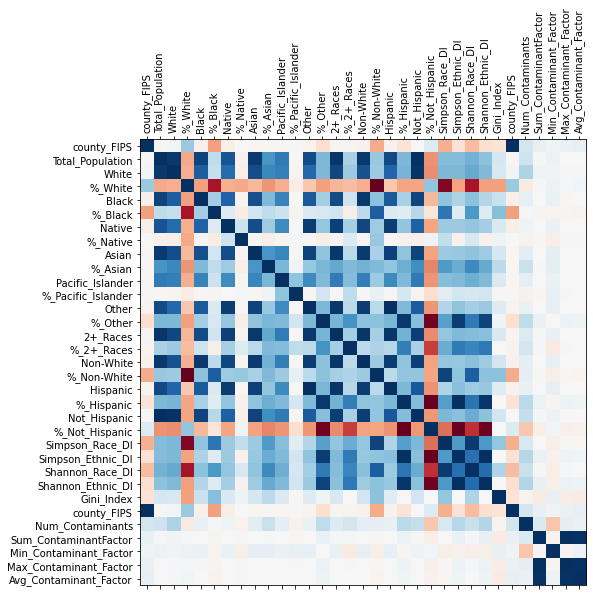

In [37]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap="RdBu", fignum = fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation="vertical");
plt.yticks(range(len(corr.columns)),corr.columns);

In [38]:
df.columns

Index(['county_FIPS', 'Geographic_Area_Name', 'County', 'GEOID',
       'Total_Population', 'White', '%_White', 'Black', '%_Black', 'Native',
       '%_Native', 'Asian', '%_Asian', 'Pacific_Islander',
       '%_Pacific_Islander', 'Other', '%_Other', '2+_Races', '%_2+_Races',
       'Non-White', '%_Non-White', 'Hispanic', '%_Hispanic', 'Not_Hispanic',
       '%_Not_Hispanic', 'Simpson_Race_DI', 'Simpson_Ethnic_DI',
       'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index', 'county_FIPS',
       'Num_Contaminants', 'Sum_ContaminantFactor', 'Min_Contaminant_Factor',
       'Max_Contaminant_Factor', 'Avg_Contaminant_Factor'],
      dtype='object')

In [45]:
# filter DF on indices and contaminants
df_contaminants = df[['Total_Population','Simpson_Race_DI', 'Simpson_Ethnic_DI',
       'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index',
       'Num_Contaminants', 'Sum_ContaminantFactor', 'Min_Contaminant_Factor',
       'Max_Contaminant_Factor', 'Avg_Contaminant_Factor']]

In [46]:
df_contaminants.head()

,Total_Population,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,Num_Contaminants,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
0,58805,0.444747,0.069410,0.986667,0.155018,0.4552,6,551,27,148,91.83
1,231767,0.321154,0.103480,0.868861,0.212231,0.4566,9,1625,28,580,180.56
2,25223,0.572334,0.112569,1.164057,0.226599,0.5047,3,1414,138,1132,471.33
3,22293,0.407736,0.064188,0.879973,0.145676,0.4500,9,2538,17,1895,282.00
4,59134,0.258546,0.176138,0.808008,0.319759,0.4685,30,37191,18,5219,1239.70


In [47]:
cor = df_contaminants.corr()
cor

,Total_Population,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,Num_Contaminants,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
Total_Population,1.000000,0.430688,0.430067,0.476412,0.412193,0.178880,0.207129,0.018536,0.059597,0.001958,0.006027
Simpson_Race_DI,0.430688,1.000000,0.562652,0.957829,0.576324,0.384826,0.157842,-0.002538,-0.061892,-0.009635,-0.021658
Simpson_Ethnic_DI,0.430067,0.562652,1.000000,0.753054,0.993532,-0.004858,0.286729,0.067295,-0.041698,0.054611,0.045668
Shannon_Race_DI,0.476412,0.957829,0.753054,1.000000,0.770562,0.298432,0.225156,0.021311,-0.066436,0.010713,-0.000088
Shannon_Ethnic_DI,0.412193,0.576324,0.993532,0.770562,1.000000,-0.006164,0.293644,0.072275,-0.061478,0.059170,0.049808
Gini_Index,0.178880,0.384826,-0.004858,0.298432,-0.006164,1.000000,-0.031669,-0.078879,0.074488,-0.076667,-0.078765
Num_Contaminants,0.207129,0.157842,0.286729,0.225156,0.293644,-0.031669,1.000000,0.146427,-0.276357,0.096307,0.069256
Sum_ContaminantFactor,0.018536,-0.002538,0.067295,0.021311,0.072275,-0.078879,0.146427,1.000000,-0.026093,0.997464,0.991249
Min_Contaminant_Factor,0.059597,-0.061892,-0.041698,-0.066436,-0.061478,0.074488,-0.276357,-0.026093,1.000000,-0.030918,0.055764
Max_Contaminant_Factor,0.001958,-0.009635,0.054611,0.010713,0.059170,-0.076667,0.096307,0.997464,-0.030918,1.000000,0.990713


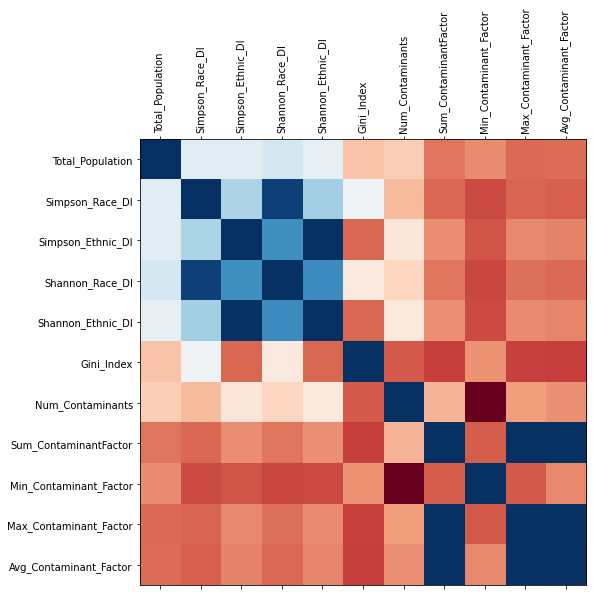

In [48]:
fig = plt.figure(figsize=(8,8))
plt.matshow(cor,cmap="RdBu", fignum = fig.number)
plt.xticks(range(len(cor.columns)),cor.columns,rotation="vertical");
plt.yticks(range(len(cor.columns)),cor.columns);